In [1]:
import urllib.request
import pandas
import xml.etree.ElementTree as ET

import seaborn as sns
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from datetime import timedelta

# 한글 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

### 데이터 정제하기

In [2]:
# data_setting에서 저장한 데이터 불러오기.
df2 = pd.read_csv('./data/Gonion.csv', index_col=0)
display(df2)

dfw = pd.read_csv('./data/weather.csv', encoding='CP949')
display(dfw)

날짜     품목명    평균가격  전일평균가격    전년가격   등급
1   20170101  대파(일반)     0.0  2833.0     0.0    특
2   20170101  대파(일반)     0.0  2164.0     0.0    상
3   20170101  대파(일반)     0.0  1747.0     0.0    중
4   20170101  대파(일반)     0.0  1214.0     0.0    하
1   20170102     NaN     NaN     NaN     NaN  NaN
..       ...     ...     ...     ...     ...  ...
4   20210526  대파(일반)  1180.0  1392.0  1208.0    하
1   20210527  대파(일반)  3699.0  3601.0  1952.0    특
2   20210527  대파(일반)  1554.0  2152.0  1639.0    상
3   20210527  대파(일반)  1247.0  1572.0  1500.0    중
4   20210527  대파(일반)  1110.0  1180.0  1257.0    하

[6390 rows x 6 columns]

지점  지점명        일시  평균기온(°C)  일강수량(mm)  일 최심신적설(cm)
0     268  진도군  20170101       4.3       NaN          NaN
1     268  진도군  20170102       8.1       0.0          NaN
2     268  진도군  20170103       5.1       NaN          NaN
3     268  진도군  20170104       4.4       NaN          NaN
4     268  진도군  20170105       7.5       0.5          NaN
...   ...  ...       ...       ...       ...          ...
1590  268  진도군  20210523      19.7       0.0          NaN
1591  268  진도군  20210524      17.6       0.0          NaN
1592  268  진도군  20210525      17.3       NaN          NaN
1593  268  진도군  20210526      17.1       0.7          NaN
1594  268  진도군  20210527      16.9       0.6          NaN

[1595 rows x 6 columns]

In [3]:
# 날씨 데이터의 NaN 값을 0으로 바꿔준다.
dfw=dfw.fillna(0)

In [4]:
# 인덱스 12341234 되어 있는걸 바꿔줌
index = range(df2.shape[0])
df2.index = index
display(df2)

날짜     품목명    평균가격  전일평균가격    전년가격   등급
0     20170101  대파(일반)     0.0  2833.0     0.0    특
1     20170101  대파(일반)     0.0  2164.0     0.0    상
2     20170101  대파(일반)     0.0  1747.0     0.0    중
3     20170101  대파(일반)     0.0  1214.0     0.0    하
4     20170102     NaN     NaN     NaN     NaN  NaN
...        ...     ...     ...     ...     ...  ...
6385  20210526  대파(일반)  1180.0  1392.0  1208.0    하
6386  20210527  대파(일반)  3699.0  3601.0  1952.0    특
6387  20210527  대파(일반)  1554.0  2152.0  1639.0    상
6388  20210527  대파(일반)  1247.0  1572.0  1500.0    중
6389  20210527  대파(일반)  1110.0  1180.0  1257.0    하

[6390 rows x 6 columns]

In [5]:
# 날씨 데이터와 파 가격 데이터를 한 데이터프레임으로 만드는 과정
# 데이터프레임에 리스트를 붙이려면 한 열이 완전하게 만들어져 있어야됨
# 한 열을 리스트로 만드는 작업
temp_list = []
rain_list = []
day_list = []
count = 0

for i1 in df2.index:
    for i2 in dfw.index:
        if df2['날짜'][i1] != dfw['일시'][i2]:
            continue
        temp_list.append(dfw['평균기온(°C)'][i2])
        rain_list.append(dfw['일강수량(mm)'][i2])
        day_list.append(dfw['일시'][i2])
        count +=1


print('temp_list', temp_list)
print(len(temp_list))
print('rain_list', rain_list)
print(len(rain_list))

temp_list [4.3, 4.3, 4.3, 4.3, 8.1, 5.1, 5.1, 5.1, 5.1, 4.4, 4.4, 4.4, 4.4, 7.5, 7.5, 7.5, 7.5, 7.2, 7.2, 7.2, 7.2, 7.1, 7.1, 7.1, 7.1, 8.1, 5.6, 5.6, 5.6, 5.6, 4.2, 4.2, 4.2, 4.2, 1.9, 1.9, 1.9, 1.9, 3.7, 3.7, 3.7, 3.7, 3.1, 3.1, 3.1, 3.1, 0.1, 0.1, 0.1, 0.1, -0.5, 1.8, 1.8, 1.8, 1.8, 0.8, 0.8, 0.8, 0.8, 3.5, 3.5, 3.5, 3.5, 2.5, 2.5, 2.5, 2.5, 0.8, 0.8, 0.8, 0.8, 1.9, 1.9, 1.9, 1.9, 0.2, -0.5, -0.5, -0.5, -0.5, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 1.3, 1.3, 1.3, 1.3, 3.1, 3.1, 3.1, 3.1, 3.9, 3.9, 3.9, 3.9, 8.8, 1.2, -0.4, -0.4, -0.4, -0.4, 1.8, 1.8, 1.8, 1.8, 0.9, 0.9, 0.9, 0.9, 1.7, 1.7, 1.7, 1.7, 6.9, 6.9, 6.9, 6.9, 6.2, 2.9, 2.9, 2.9, 2.9, 2.4, 2.4, 2.4, 2.4, 2.6, 2.6, 2.6, 2.6, 0.0, 0.0, 0.0, 0.0, -1.5, -1.5, -1.5, -1.5, 0.2, 0.2, 0.2, 0.2, 1.7, 2.9, 2.9, 2.9, 2.9, 3.8, 3.8, 3.8, 3.8, 2.1, 2.1, 2.1, 2.1, 8.5, 8.5, 8.5, 8.5, 5.1, 5.1, 5.1, 5.1, 0.7, 0.7, 0.7, 0.7, 6.0, 3.8, 3.8, 3.8, 3.8, 3.2, 3.2, 3.2, 3.2, 8.1, 8.1, 8.1, 8.1, 2.6, 2.6, 2.6, 2.6, 1.6, 1.6, 1.6, 1.6, 4.0, 4.0, 4

In [6]:
# 바로 위에 보면 열이 6390개인데 여기서는 6338개가 나옴!
# 바로 데이터 확인 함(차집합 이용)
dd=np.array(df2['날짜'].tolist())
dl=np.array(day_list)
intersection = np.array(list(set(dd)-set(dl)))
print(intersection)
print(len(intersection))

# 13*4 해서 누락된 52개의 데이터를 확인함.
# 엑셀로 확인해 보니 저 날씨 데이터가 누락되어있었음

[20170720 20170721 20170722 20190529 20191202 20191017 20191018 20171116
 20171221 20171222 20171031 20171130 20200702]
13


In [7]:
# 기상청 기록이 13개가 없던 것
# 그래서 리스트에 매핑하려고 했는데 수가 없어가지고 아마 오류가 났을것이다.
#누락된 52개 데이터 삭제
tf=[]

for i in df2.index:
    if df2['날짜'][i] in intersection:
        df2= df2.drop(index=i, axis=0)

# df2를 df22로 옮기기
df22= df2.copy()
# 누락된 데이터가 잘 삭제되었는지 확인
print(len(df22.index))

6338


In [8]:
# df22에 데이터를 붙여주기
df22['평균기온'] = temp_list
df22['강수량'] = rain_list
display(df22)

날짜     품목명    평균가격  전일평균가격    전년가격   등급  평균기온  강수량
0     20170101  대파(일반)     0.0  2833.0     0.0    특   4.3  0.0
1     20170101  대파(일반)     0.0  2164.0     0.0    상   4.3  0.0
2     20170101  대파(일반)     0.0  1747.0     0.0    중   4.3  0.0
3     20170101  대파(일반)     0.0  1214.0     0.0    하   4.3  0.0
4     20170102     NaN     NaN     NaN     NaN  NaN   8.1  0.0
...        ...     ...     ...     ...     ...  ...   ...  ...
6385  20210526  대파(일반)  1180.0  1392.0  1208.0    하  17.1  0.7
6386  20210527  대파(일반)  3699.0  3601.0  1952.0    특  16.9  0.6
6387  20210527  대파(일반)  1554.0  2152.0  1639.0    상  16.9  0.6
6388  20210527  대파(일반)  1247.0  1572.0  1500.0    중  16.9  0.6
6389  20210527  대파(일반)  1110.0  1180.0  1257.0    하  16.9  0.6

[6338 rows x 8 columns]

In [9]:
df22.shape

(6338, 8)

In [10]:
# 누락된 데이터 삭제
# 대파 데이터에서 누락된 데이터 삭제, 대파 데이터에는 누락값이 2가지가 있음
# 0원으로 기록된 것과 NaN값으로 아예 아무 데이터도 없는 것.
# NaN값은 그 전가격 아무것도 없기 때문에 삭제해 주기로 함.
df22.isna().sum()

날짜         0
품목명       14
평균가격      14
전일평균가격    14
전년가격      14
등급        14
평균기온       0
강수량        0
dtype: int64

In [11]:
df22 = df22.dropna()
display(df22)

날짜     품목명    평균가격  전일평균가격    전년가격 등급  평균기온  강수량
0     20170101  대파(일반)     0.0  2833.0     0.0  특   4.3  0.0
1     20170101  대파(일반)     0.0  2164.0     0.0  상   4.3  0.0
2     20170101  대파(일반)     0.0  1747.0     0.0  중   4.3  0.0
3     20170101  대파(일반)     0.0  1214.0     0.0  하   4.3  0.0
5     20170103  대파(일반)  2833.0     0.0  2761.0  특   5.1  0.0
...        ...     ...     ...     ...     ... ..   ...  ...
6385  20210526  대파(일반)  1180.0  1392.0  1208.0  하  17.1  0.7
6386  20210527  대파(일반)  3699.0  3601.0  1952.0  특  16.9  0.6
6387  20210527  대파(일반)  1554.0  2152.0  1639.0  상  16.9  0.6
6388  20210527  대파(일반)  1247.0  1572.0  1500.0  중  16.9  0.6
6389  20210527  대파(일반)  1110.0  1180.0  1257.0  하  16.9  0.6

[6324 rows x 8 columns]

#### 데이터 파악

In [12]:
# 데이터 정보 확인
df22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6324 entries, 0 to 6389
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      6324 non-null   int64  
 1   품목명     6324 non-null   object 
 2   평균가격    6324 non-null   float64
 3   전일평균가격  6324 non-null   float64
 4   전년가격    6324 non-null   float64
 5   등급      6324 non-null   object 
 6   평균기온    6324 non-null   float64
 7   강수량     6324 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 444.7+ KB


In [13]:
df22.describe()

날짜          평균가격        전일평균가격          전년가격         평균기온  \
count  6.324000e+03   6324.000000   6324.000000   6324.000000  6324.000000   
mean   2.018813e+07   1581.423941   1582.323371   1334.657337    13.753574   
std    1.277048e+04   1106.623326   1105.753259    857.593694     8.481000   
min    2.017010e+07      0.000000      0.000000      0.000000    -8.200000   
25%    2.018022e+07    946.000000    946.750000    866.000000     6.700000   
50%    2.019032e+07   1423.000000   1425.000000   1329.500000    13.700000   
75%    2.020043e+07   2072.500000   2074.000000   1862.000000    21.000000   
max    2.021053e+07  10749.000000  10749.000000  10749.000000    29.500000   

               강수량  
count  6324.000000  
mean      3.705187  
std      15.402556  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.400000  
max     305.000000

##### 등급별로 그룹

In [14]:
# 가격 데이터를 보면 하루에 특, 상, 중, 하 4개로 나누어져 있으므로,
# 이 4개의 데이터가 섞이지 않도록 하기 위해 groupby로 등급별로 나눠준다.
print('## groupby (등급) ##')
grouped = df22.groupby('등급')

#그룹 확인
for name, group in grouped:
    print('groupname: ', name)
    print('groupdata')
    print(group)

#그룹 추출
adf = grouped.get_group(name='특')
bdf = grouped.get_group(name='상')
cdf = grouped.get_group(name='중')
ddf = grouped.get_group(name='하')

## groupby (등급) ##
groupname:  상
groupdata
            날짜     품목명    평균가격  전일평균가격    전년가격 등급  평균기온  강수량
1     20170101  대파(일반)     0.0  2164.0     0.0  상   4.3  0.0
6     20170103  대파(일반)  2164.0     0.0  1926.0  상   5.1  0.0
10    20170104  대파(일반)  2100.0  2164.0  2126.0  상   4.4  0.0
14    20170105  대파(일반)  2100.0  2100.0  1848.0  상   7.5  0.5
18    20170106  대파(일반)  2100.0  2100.0  1865.0  상   7.2  0.2
...        ...     ...     ...     ...     ... ..   ...  ...
6371  20210523  대파(일반)     0.0  1883.0  1546.0  상  19.7  0.0
6375  20210524  대파(일반)  1804.0     0.0     0.0  상  17.6  0.0
6379  20210525  대파(일반)  2153.0  1804.0  1614.0  상  17.3  0.0
6383  20210526  대파(일반)  2152.0  2153.0  1623.0  상  17.1  0.7
6387  20210527  대파(일반)  1554.0  2152.0  1639.0  상  16.9  0.6

[1581 rows x 8 columns]
groupname:  중
groupdata
            날짜     품목명    평균가격  전일평균가격    전년가격 등급  평균기온  강수량
2     20170101  대파(일반)     0.0  1747.0     0.0  중   4.3  0.0
7     20170103  대파(일반)  1747.0     0.0  1611.0  중   5.

In [15]:
# 기초 통계량
print('특 가격 통계\n', adf['평균가격'].describe(), '\n')
print('상 가격 통계\n', bdf['평균가격'].describe(), '\n')
print('중 가격 통계\n', cdf['평균가격'].describe(), '\n')
print('하 가격 통계\n', ddf['평균가격'].describe(), '\n')



특 가격 통계
 count     1581.000000
mean      2187.337128
std       1296.669209
min          0.000000
25%       1600.000000
50%       2141.000000
75%       2699.000000
max      10749.000000
Name: 평균가격, dtype: float64 

상 가격 통계
 count    1581.000000
mean     1688.550917
std      1040.067714
min         0.000000
25%      1217.000000
50%      1581.000000
75%      2093.000000
max      5788.000000
Name: 평균가격, dtype: float64 

중 가격 통계
 count    1581.000000
mean     1356.450980
std       907.954596
min         0.000000
25%       960.000000
50%      1233.000000
75%      1639.000000
max      5254.000000
Name: 평균가격, dtype: float64 

하 가격 통계
 count    1581.000000
mean     1093.356736
std       803.405687
min         0.000000
25%       734.000000
50%       953.000000
75%      1322.000000
max      4929.000000
Name: 평균가격, dtype: float64 



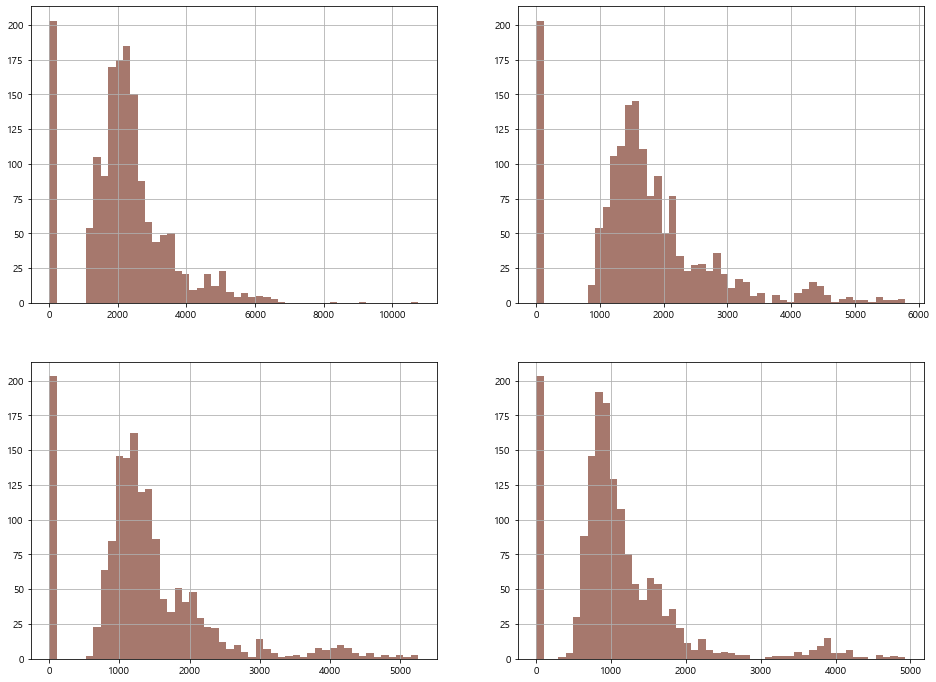

In [16]:
# 분포
def plot_price (l1,l2,l3, l4):
    plt.figure(figsize=(16,12))
    plt.subplot(221)
    l1['평균가격'].hist(bins=50, color='#A6786D')
    plt.subplot(222)
    l2['평균가격'].hist(bins=50, color='#A6786D')
    plt.subplot(223)
    l3['평균가격'].hist(bins=50, color='#A6786D')
    plt.subplot(224)
    l4['평균가격'].hist(bins=50, color='#A6786D')

plot_price(adf, bdf,cdf,ddf)
# 데이터를 보면 0이 엄청 많은 것을 확인할 수 있음... 0 삭제

In [17]:
# 가격 데이터가 없는 곳에는 0이라 되어 있으므로 0 -> NaN
# 나눈 상태에서 NaN 값에 평균을 넣어 줘야 하는구나,,,
# 4개를 모두 다 해야 하기 때문에 함수로 만들어 준다.
def zeroToNaN (list):
    list['평균가격'] = list['평균가격'].replace(0, np.NaN)
    display('평균가격 0.0 -> NaN',list.head())

    list = list.fillna(list.mean())
    list = list.round(1)
    display('평균가격 NaN -> 열의 평균',list.head())
    return list


adf = zeroToNaN(adf)
bdf = zeroToNaN(bdf)
cdf = zeroToNaN(cdf)
ddf = zeroToNaN(ddf)

c:\201814471\setup\envs\py37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


'평균가격 0.0 -> NaN'

날짜     품목명    평균가격  전일평균가격    전년가격 등급  평균기온  강수량
0   20170101  대파(일반)     NaN  2833.0     0.0  특   4.3  0.0
5   20170103  대파(일반)  2833.0     0.0  2761.0  특   5.1  0.0
9   20170104  대파(일반)  2797.0  2833.0  2957.0  특   4.4  0.0
13  20170105  대파(일반)  2797.0  2797.0  2621.0  특   7.5  0.5
17  20170106  대파(일반)  2797.0  2797.0  2599.0  특   7.2  0.2

'평균가격 NaN -> 열의 평균'

날짜     품목명    평균가격  전일평균가격    전년가격 등급  평균기온  강수량
0   20170101  대파(일반)  2509.6  2833.0     0.0  특   4.3  0.0
5   20170103  대파(일반)  2833.0     0.0  2761.0  특   5.1  0.0
9   20170104  대파(일반)  2797.0  2833.0  2957.0  특   4.4  0.0
13  20170105  대파(일반)  2797.0  2797.0  2621.0  특   7.5  0.5
17  20170106  대파(일반)  2797.0  2797.0  2599.0  특   7.2  0.2

c:\201814471\setup\envs\py37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


'평균가격 0.0 -> NaN'

날짜     품목명    평균가격  전일평균가격    전년가격 등급  평균기온  강수량
1   20170101  대파(일반)     NaN  2164.0     0.0  상   4.3  0.0
6   20170103  대파(일반)  2164.0     0.0  1926.0  상   5.1  0.0
10  20170104  대파(일반)  2100.0  2164.0  2126.0  상   4.4  0.0
14  20170105  대파(일반)  2100.0  2100.0  1848.0  상   7.5  0.5
18  20170106  대파(일반)  2100.0  2100.0  1865.0  상   7.2  0.2

'평균가격 NaN -> 열의 평균'

날짜     품목명    평균가격  전일평균가격    전년가격 등급  평균기온  강수량
1   20170101  대파(일반)  1937.3  2164.0     0.0  상   4.3  0.0
6   20170103  대파(일반)  2164.0     0.0  1926.0  상   5.1  0.0
10  20170104  대파(일반)  2100.0  2164.0  2126.0  상   4.4  0.0
14  20170105  대파(일반)  2100.0  2100.0  1848.0  상   7.5  0.5
18  20170106  대파(일반)  2100.0  2100.0  1865.0  상   7.2  0.2

c:\201814471\setup\envs\py37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


'평균가격 0.0 -> NaN'

날짜     품목명    평균가격  전일평균가격    전년가격 등급  평균기온  강수량
2   20170101  대파(일반)     NaN  1747.0     0.0  중   4.3  0.0
7   20170103  대파(일반)  1747.0     0.0  1611.0  중   5.1  0.0
11  20170104  대파(일반)  2000.0  1747.0  1797.0  중   4.4  0.0
15  20170105  대파(일반)  2000.0  2000.0  1707.0  중   7.5  0.5
19  20170106  대파(일반)  2000.0  2000.0  1566.0  중   7.2  0.2

'평균가격 NaN -> 열의 평균'

날짜     품목명    평균가격  전일평균가격    전년가격 등급  평균기온  강수량
2   20170101  대파(일반)  1556.3  1747.0     0.0  중   4.3  0.0
7   20170103  대파(일반)  1747.0     0.0  1611.0  중   5.1  0.0
11  20170104  대파(일반)  2000.0  1747.0  1797.0  중   4.4  0.0
15  20170105  대파(일반)  2000.0  2000.0  1707.0  중   7.5  0.5
19  20170106  대파(일반)  2000.0  2000.0  1566.0  중   7.2  0.2

c:\201814471\setup\envs\py37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


'평균가격 0.0 -> NaN'

날짜     품목명    평균가격  전일평균가격    전년가격 등급  평균기온  강수량
3   20170101  대파(일반)     NaN  1214.0     0.0  하   4.3  0.0
8   20170103  대파(일반)  1214.0     0.0  1434.0  하   5.1  0.0
12  20170104  대파(일반)  1838.0  1214.0  1532.0  하   4.4  0.0
16  20170105  대파(일반)  1838.0  1838.0  1498.0  하   7.5  0.5
20  20170106  대파(일반)  1838.0  1838.0  1419.0  하   7.2  0.2

'평균가격 NaN -> 열의 평균'

날짜     품목명    평균가격  전일평균가격    전년가격 등급  평균기온  강수량
3   20170101  대파(일반)  1254.4  1214.0     0.0  하   4.3  0.0
8   20170103  대파(일반)  1214.0     0.0  1434.0  하   5.1  0.0
12  20170104  대파(일반)  1838.0  1214.0  1532.0  하   4.4  0.0
16  20170105  대파(일반)  1838.0  1838.0  1498.0  하   7.5  0.5
20  20170106  대파(일반)  1838.0  1838.0  1419.0  하   7.2  0.2

In [18]:
# 삭제된 데이터 확인
plot_price(adf, bdf,cdf,ddf)

In [19]:
# 데이터를 계속 정제하는 수고로움을 막기 위해 정제하고 나는 특 데이터를 csv 파일로 저장해둠
# 모델링할 때 바로 계속계속 쓰기 위해서
adf.to_csv('./data/best.csv',encoding = 'utf-8-sig' )
bdf.to_csv('./data/good.csv',encoding = 'utf-8-sig')
cdf.to_csv('./data/average.csv',encoding = 'utf-8-sig')
ddf.to_csv('./data/bad.csv',encoding = 'utf-8-sig')

<AxesSubplot:>

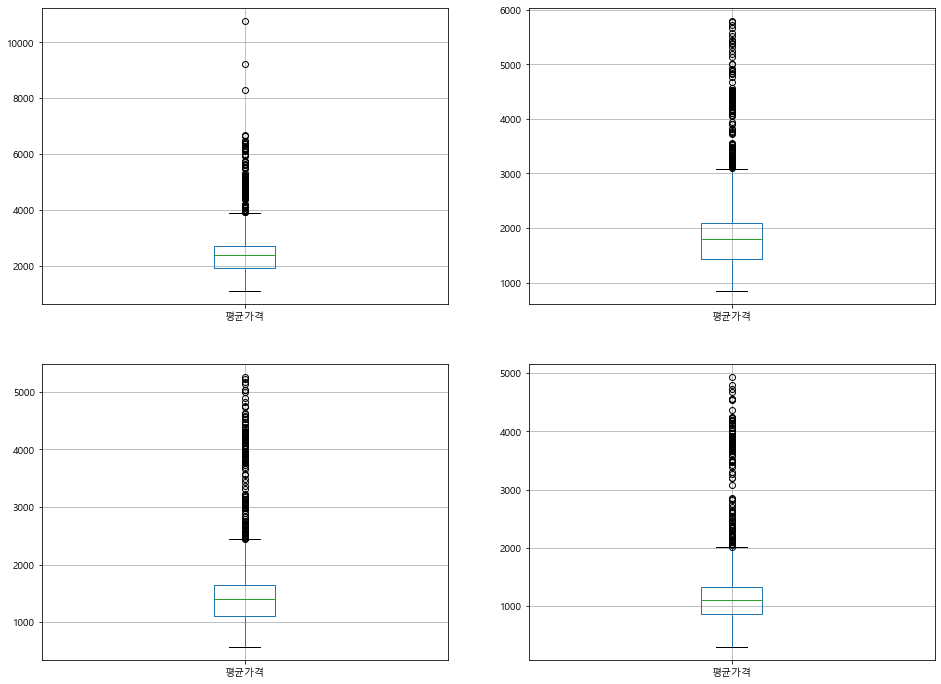

In [20]:
# 데이터 해석: 초록선-중앙값, 네모-1~3사분위수, 선끝-최대, 최소, 동그라미 최대최소 나가는거
# 동그라미가 왜이렇게 많냐면 그래프 작게 그리고 데이터는 많아가지고 이렇게 나오는거 대부분은 박스 안에
# 있음
plt.figure(figsize=(16,12))
plt.subplot(221)
adf.boxplot(column=['평균가격'])
plt.subplot(222)
bdf.boxplot(column=['평균가격'])
plt.subplot(223)
cdf.boxplot(column=['평균가격'])
plt.subplot(224)
ddf.boxplot(column=['평균가격'])

c:\201814471\setup\envs\py37\lib\site-packages\ipykernel_launcher.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


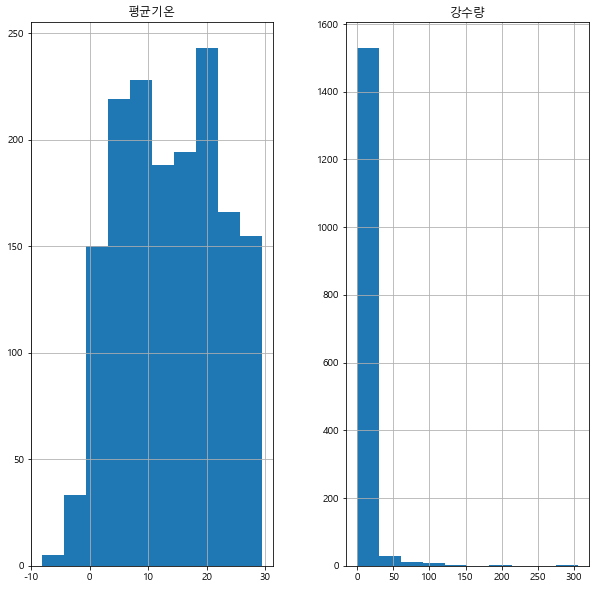

In [21]:
# 입력변수 탐색
check_columns = ['평균기온', '강수량']

fig=plt.figure(figsize=(10, 10))
ax = fig.gca()

# 4개 다 똑같으니까 날씨 정보는 하나만 봐도 됨.
adf[check_columns].hist(ax=ax)
plt.rc('axes', unicode_minus=False)
plt.show()

#이 데이터를 보면 평균 기온은 이렇게 분포가 되어 있고, 강수량을 보니 비가 안올 때 데이터가 많음

In [22]:
# Person 상관계수
check_columns = ['평균가격','평균기온', '강수량']

corr = adf[check_columns].corr(method='pearson')
corr

# 큰일났다 둘다 0에 가깝다: 변수 사이에 선형 관계가 없다
# 선형 회귀로 한다면 제대로 안나올 것 같다.

평균가격      평균기온       강수량
평균가격  1.00000 -0.091170  0.019380
평균기온 -0.09117  1.000000  0.154197
강수량   0.01938  0.154197  1.000000

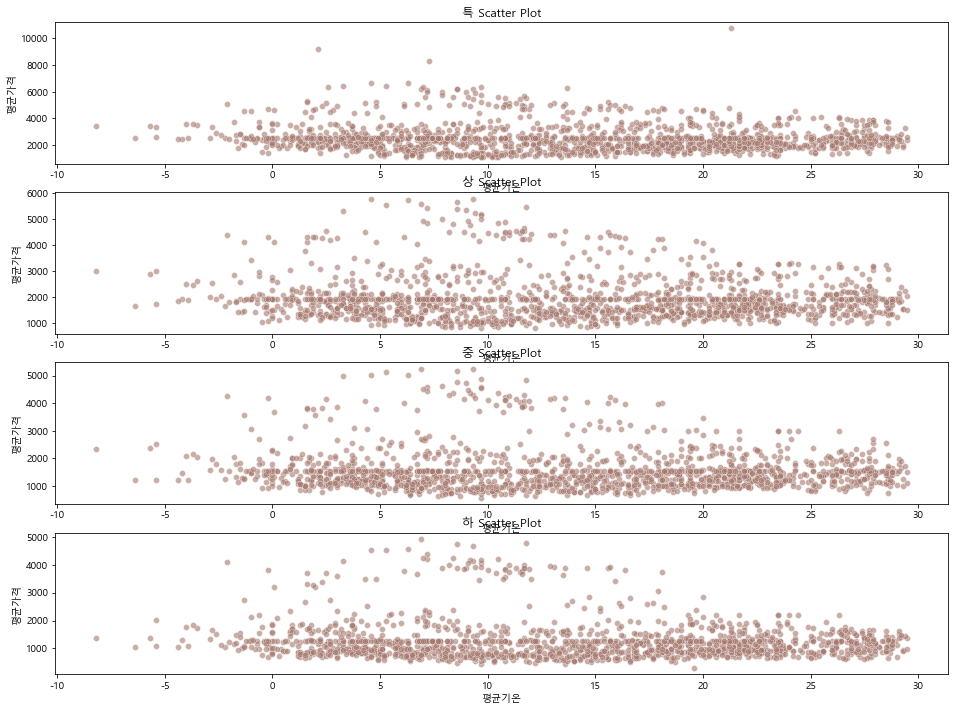

In [23]:
# 평균 기온과 평균 가격 사이의 관계 확인
def plot_scatter(l1, l2, l3, l4,input1,input2):
    plt.figure(figsize=(16,12))
    plt.subplot(411)
    sns.scatterplot(data=l1, x=input1, y=input2, markers='o',
                    color='#A6786D', alpha=0.6)
    plt.title('특 Scatter Plot')
    plt.subplot(412)

    sns.scatterplot(data=l2, x=input1, y=input2, markers='o',
                    color='#A6786D', alpha=0.6)
    plt.title('상 Scatter Plot')
    plt.subplot(413)

    sns.scatterplot(data=l3, x=input1, y=input2, markers='o',
                    color='#A6786D', alpha=0.6)
    plt.title('중 Scatter Plot')
    plt.subplot(414)
    sns.scatterplot(data=l4, x=input1, y=input2, markers='o',
                    color='#A6786D', alpha=0.6)
    plt.title('하 Scatter Plot')
    plt.show()



plot_scatter(adf, bdf, cdf, ddf, '평균기온', '평균가격')

# 결과를 보면, 선형적으로 올라가는게 전혀 없고, 기온에 따른 가격이 대체로 일정한 것을 볼 수 있음
# 등급마다 특정 가격대에 가격이 몰려 있음

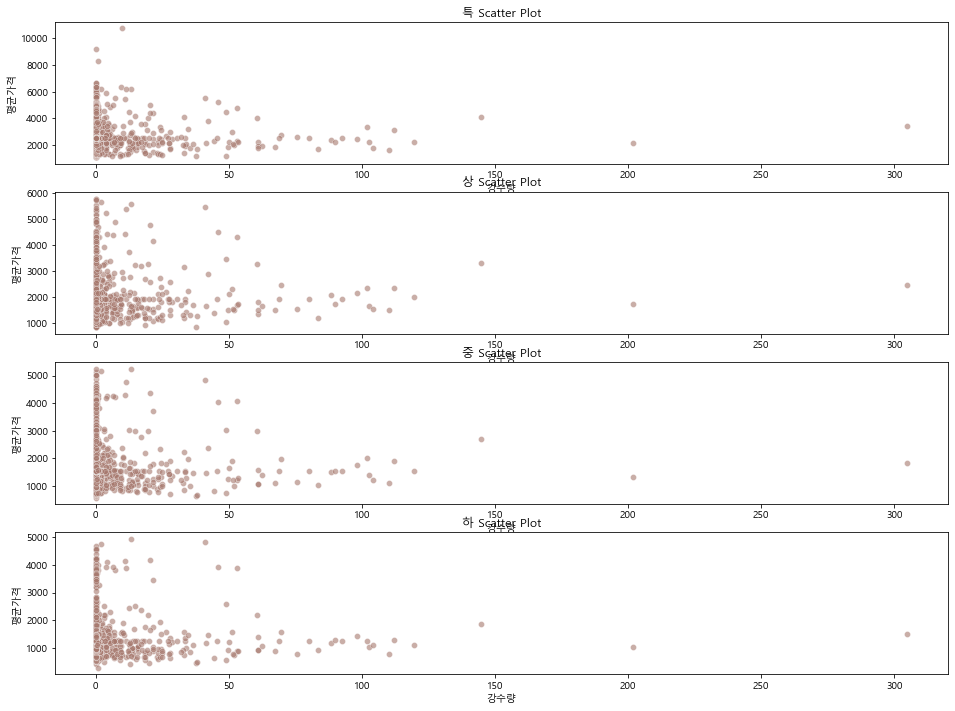

In [24]:
# 강수량 과 평균가격 사이의 관계 확인
plot_scatter(adf,bdf,cdf,ddf,'강수량', '평균가격')


# 비가 많이오든...날이 춥던 덥든...비슷하고 특별하게 가격이 튀는 날이 얼마 없음
# 일단 선형회귀를 한번 돌려봄 혹시 모르니까, 근데 시계열 모델을 사용할 마음의 준비는 하고 있었음
